Using google colab we need to mount the drive to be able to read files on google drive. Therefore we import the package drive




In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import itertools
from scipy.stats import norm

from matplotlib.ticker import StrMethodFormatter


# **Data Exploration and Visualization**

Read the csv file we transformed from the provided xls for the Pilgrim Bank Case

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining Data Warehousing/PilgrimBankCase.csv')



In [ ]:
df

,id,profit,online,age,inc,tenure,district
0,1,21,0,NaN,NaN,6.33,1200
1,2,-6,0,6.0,3.0,29.50,1200
2,4,-4,0,NaN,NaN,2.25,1200
3,5,-61,0,2.0,9.0,9.91,1200
4,6,-38,0,NaN,3.0,2.33,1300
...,...,...,...,...,...,...,...
31629,31619,-217,1,6.0,3.0,6.16,1100
31630,31620,235,1,4.0,8.0,29.75,1200
31631,31623,269,1,4.0,3.0,21.08,1200
31632,31627,-59,1,5.0,9.0,3.50,1200


Check dimensions as in rows and columns

In [ ]:
df.shape


(31634, 7)

Check for NaN in column profit

In [ ]:
df['profit'].isnull().values.any()


False

Check if there are rows with at least 1 missing value

In [ ]:
df.isna().any(axis=1).sum()

8822

Check data types of observed and saved variables

In [ ]:
df.dtypes


id            int64
profit        int64
online        int64
age         float64
inc         float64
tenure      float64
district      int64
dtype: object

A first glance at descriptive statistics for the variable profit

In [ ]:
df.describe()["profit"]

count    31634.000000
mean       111.502687
std        272.839391
min       -221.000000
25%        -34.000000
50%          9.000000
75%        164.000000
max       2071.000000
Name: profit, dtype: float64

We want to check the frequency distribution of the variable profit

In [ ]:
"""
ax = df.hist(column='profit', range=[-500, 2500],bins=20, grid=False, figsize=(12,8), color='orange', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:


x.spines['right'].set_visible(False)
x.spines['top'].set_visible(False)
x.spines['left'].set_visible(False)


x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

x.set_title("")

x.set_xlabel("Profitability", labelpad=20, weight='bold', size=12)
    
x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
"""



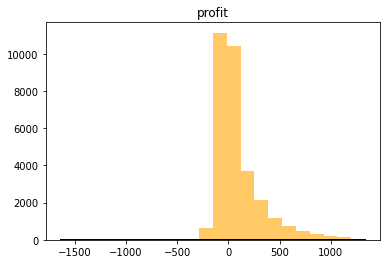

In [ ]:

df.hist(column='profit', bins=20, alpha=0.6, color='orange',grid=False,range=[-1500, 1200])
  

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

The distribution is right skewed

A normal distribution would actually look like this with $\bar{x}= 111.50$, $s=272.83$ and a large sample size of $N=100000$

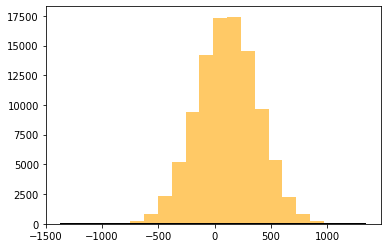

In [ ]:
data = norm.rvs(111.50, 272.83, size=100000)

mu, std = norm.fit(data)

plt.hist(data, bins=20, alpha=0.6, color='orange')
  
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

The normality assumption is important when two groups have rather small sample sizes than for larger sample sizes. But we still will have a look at the qq-plot. If our observation is normally distributed we expect the QQ plot showing the observed values falling very clsoe to the red line. 



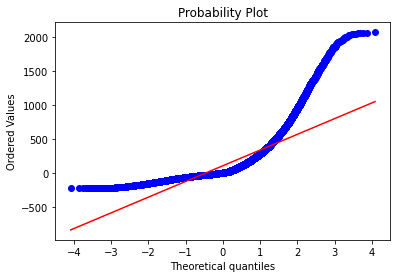

In [ ]:
profit_array = df.loc[:,'profit'].values
st.probplot(profit_array, dist="norm", plot=plt)
plt.show()

Check for outliers via Boxplot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


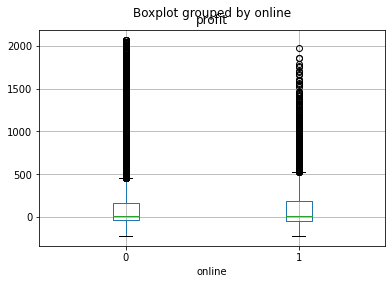

In [ ]:

df.boxplot(column='profit',by='online')

# **Inferial Statistics**

## *Question 1*

To infer the population mean we will have to estimate the population mean parameter μ by calculating the 95% Confidence Interval. 

To calculate this we need the sample mean and the standard error for profit that we saw earlier from the output of the descriptive statistic. With $n>30$ we can use $t=1.96$

The 95%- Confidence Intervall is calculated as follows:

$\bar{x}\pm t\ast\frac{s}{\sqrt{n}}$







Note that most populations obey the Central Limit Theorem which also would allow us to compute normal confidence interval

In [ ]:
profit_mean = df[["profit"]].mean()
profit_mean


profit    111.502687
dtype: float64

In [ ]:
profit_std = df[["profit"]].std()
profit_std

profit    272.839391
dtype: float64

In [ ]:
profit_n=df[["profit"]].count()
profit_n

profit    31634
dtype: int64

We use a predefined function to calculate the 95%-Confidence Interval

In [ ]:
conf = sms.DescrStatsW(df['profit']).tconfint_mean(alpha=0.05)
conf

(108.4959549406385, 114.50941902408302)

## *Question 2*  

Check for missing values in variable profit

In [ ]:
df['online'].isnull().values.any()


False

We look again at the descriptive statistics

In [ ]:
df_online_stats = df.groupby('online')['profit'].describe()
df_online_stats


,count,mean,std,min,25%,50%,75%,max
online,,,,,,,,
0,27780.0,110.786249,271.300975,-221.0,-33.0,9.0,161.0,2071.0
1,3854.0,116.666840,283.664637,-221.0,-43.0,12.0,186.0,1979.0


Compare both frequency distributions by plotting a histogram for each offline = 0 and online = 1 customers

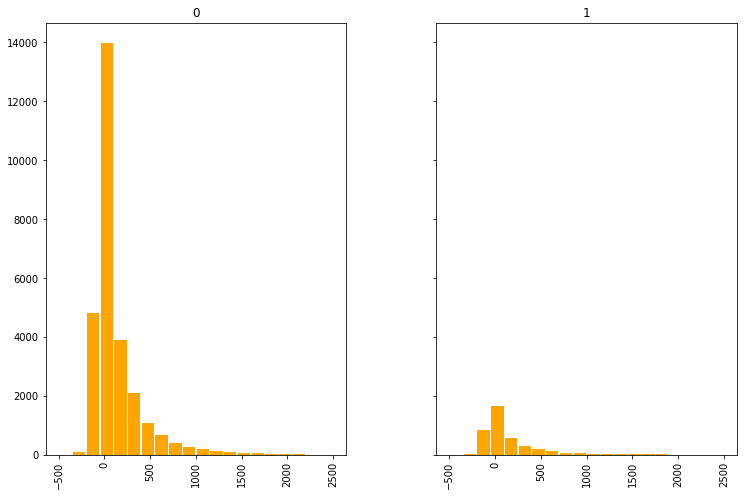

In [ ]:
ax2=df['profit'].hist(by=df['online'],range=[-500, 2500],bins=20, grid=False, figsize=(12,8), color='orange', zorder=2, rwidth=0.9,sharey=True)



Calculating difference of grouped means 

In [ ]:
df_online_mean = df.groupby('online')['profit'].mean()

diff = round(abs(df_online_mean.iloc[0]- df_online_mean.iloc[1]),2)
diff



5.88

Create Arrays of grouped profits which we will use as input for Welsh's Test function

In [ ]:
df_grouped_online = df.loc[df['online'] == 1]
df_grouped_online['profit']
online_array = df_grouped_online.loc[:,'profit'].values

print(online_array)

[ -49 -135  -14 ...  269  -59   92]


In [ ]:
df_grouped_offline = df.loc[df['online'] == 0]
df_grouped_offline['profit']
offline_array = df_grouped_offline.loc[:,'profit'].values

print(offline_array)

[ 21  -6  -4 ... 458 -83 124]


Conduction Welsh's Test 

In [ ]:
st.ttest_ind(online_array, offline_array, equal_var=False)


Ttest_indResult(statistic=1.2123508938935355, pvalue=0.22543675497849353)